In [2]:
import pandas as pd

In [3]:
mod_input = pd.read_csv('../../data/model_input.csv')

In [4]:
Y = mod_input[['home_win']]
X = mod_input[['home_vs_away_points_diffppg']]

In [5]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.618697
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.102     
Dependent Variable:    home_win           AIC:                18067.9576
Date:                  2020-05-05 08:48   BIC:                18075.5463
No. Observations:      14600              Log-Likelihood:     -9033.0   
Df Model:              0                  LL-Null:            -10056.   
Df Residuals:          14599              LLR p-value:        nan       
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------
home_vs_away_points_diffppg 2.3394   0.0605 38.6610

In [6]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=123)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\athompson-leduc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print('the threshold is', Y.mean())

Accuracy of logistic regression classifier on test set: 0.63
the threshold is home_win    0.546712
dtype: float64


In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 699  645]
 [ 434 1142]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.56      1344
           1       0.64      0.72      0.68      1576

    accuracy                           0.63      2920
   macro avg       0.63      0.62      0.62      2920
weighted avg       0.63      0.63      0.63      2920



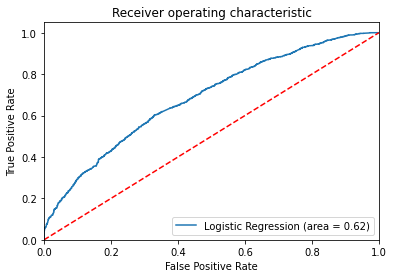

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()